In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as skl

import scipy
from sklearn.model_selection import train_test_split
import collections


In [2]:
train_main = pd.read_csv("data/train_music.csv",delimiter=",")
test_main = pd.read_csv("data/test_music.csv",delimiter=",")
sample_submission = pd.read_csv("data/sample_submission_music.csv",delimiter=",")

In [3]:
train_main.head()

,id,target,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,...,service_5_count_m3,service_6_count_m3,service_7_cost_m3,service_7_flag_m3,service_8_count_m3,income_brnd_cont_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,service_9_flag_m3
0,48104912810,0,7,1514,3,1.0,0,0.496508,0,299.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,13762.315646,1292.468784,NaN
1,4851497268,0,4,896,28,1.0,0,0.881540,0,189.0,...,11.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.000053,NaN
2,4877823097,0,7,592,3,2.0,0,0.811192,0,347.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.000977,NaN
3,4830183791,0,7,1756,3,2.0,0,0.928449,1,343.0,...,66.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.006680,NaN
4,48103940036,0,4,1057,28,1.0,0,0.578654,0,355.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.002487,1.0


In [6]:
train_main.shape

(70000, 461)

In [7]:
train_main.id.value_counts().shape

(70000,)

In [9]:
set(train_main['id']).intersection(set(test_main['id'])) #== set(train['ID'])

set()

duplicate ids

In [11]:
#2 equal ids
import collections
a = train_main['id']#[1,1,1,1,2,2,2,2,3,3,4,5,5]
counter=collections.Counter(a)
#print(counter)
# Counter({1: 4, 2: 4, 3: 2, 5: 2, 4: 1})
#print(counter.values())
# [4, 4, 2, 1, 2]
#print(counter.keys())
# [1, 2, 3, 4, 5]
print(counter.most_common(3))
# [(1, 4), (2, 4), (3, 2)]

[(48100278273, 1), (48103686146, 1), (4888199171, 1)]


In [3]:
Y=train_main['target']
#0 - id, 1 - target
X=train_main.drop(train_main.columns[[1]], axis=1)

split data into train and validation sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [13]:
counter=collections.Counter(y_train)
print(counter)

Counter({0: 45257, 1: 3743})


In [14]:
3743/45257

0.08270543783282144

In [15]:
counter=collections.Counter(y_test)
print(counter)

Counter({0: 19442, 1: 1558})


In [16]:
1558/19442

0.0801357884991256

In [20]:
X_train.head()

,id,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,service_1_flag,...,service_5_count_m3,service_6_count_m3,service_7_cost_m3,service_7_flag_m3,service_8_count_m3,income_brnd_cont_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,service_9_flag_m3
13802,4813619043,4,896,28,1.0,0,0.955483,0,322.0,1.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.178622,NaN
41012,48105220472,1,1,1,NaN,0,0.550999,0,318.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.022203,1.0
2262,4819698671,7,592,3,1.0,0,0.957614,0,359.0,1.0,...,4.0,0.0,0.0,0.0,0.0,0.7843,35.860094,1.336134,1.169779,NaN
58404,4848626425,7,1057,3,2.0,0,0.888445,0,343.0,1.0,...,57.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
40786,4889927958,7,592,3,2.0,0,0.767179,0,357.0,1.0,...,92.0,0.0,0.0,0.0,0.0,7.8432,NaN,7396.798472,232.159164,NaN


In [21]:
#X_train.to_csv('X_train.csv')
#X_test.to_csv('X_test.csv')
#y_train.to_csv('y_train.csv')
#y_test.to_csv('y_test.csv')

are there not numeric values? No:

In [17]:
num_cols = X_train._get_numeric_data().columns
cols = X_train.columns
list(set(cols) - set(num_cols))

[]

In [24]:
#X_train.nunique().to_excel("nuniq.xlsx") #done!
#X_train.dtypes.to_excel("types.xlsx") #done!

In [18]:
X_train.nunique().head()

id                       49000
device_type                  7
manufacturer_category      414
os_category                 17
sim_count                    3
dtype: int64

number of missings

In [26]:
#X_train.isnull().sum().to_excel("numNull.xlsx")  #done!

In [27]:
X_train.id.value_counts().shape

(49000,)

In [28]:
#X_train.describe().to_excel("describe.xlsx") #done!

In [22]:
#X_train.describe(percentiles = [0.01, 0.05, 0.95, 0.99]).to_excel("describe2.xlsx") #done!

For each variable:
check that description and min/max/Q1/Q3 are logical
define whether categorical, ordinal or numeric (if 1st -> hot encoding later)
outliers and negative values - treat <0 to 0 if logical? censor outliers?
null values -> replace with another value?

In [23]:
XYtrain = X_train
XYtrain.loc[:,'target'] = y_train

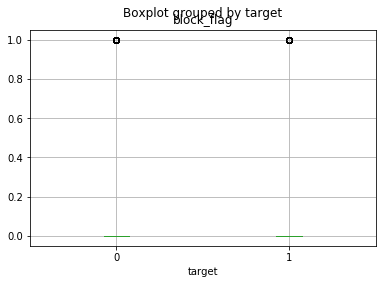

In [24]:
XYtrain.boxplot(['block_flag'],by='target')

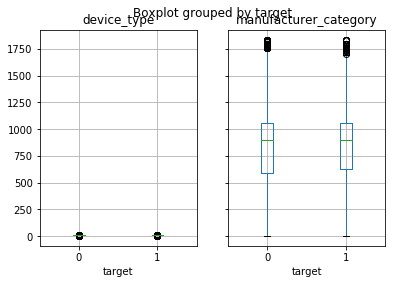

In [11]:
#XYtrain.boxplot(['device_type','manufacturer_category'],by='target')
#plt.savefig('boxplot')

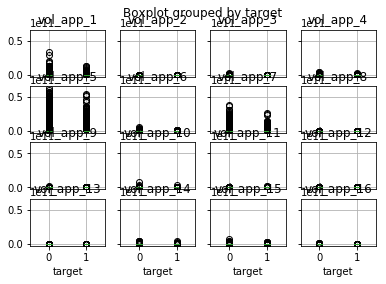

In [12]:
XYtrain.boxplot(['vol_app_1','vol_app_2','vol_app_3','vol_app_4','vol_app_5','vol_app_6','vol_app_7',
            'vol_app_8','vol_app_9','vol_app_10','vol_app_11','vol_app_12','vol_app_13','vol_app_14','vol_app_15','vol_app_16'],by='target')
plt.savefig('boxplot')

In [18]:
col_names = list(XYtrain.columns.values)
#XYtrain_sc = scaler.fit_transform(XYtrain)

In [19]:
scaler = skl.preprocessing.StandardScaler()
XYtrain_sc = pd.DataFrame(data=scaler.fit_transform(XYtrain), columns=col_names)

c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


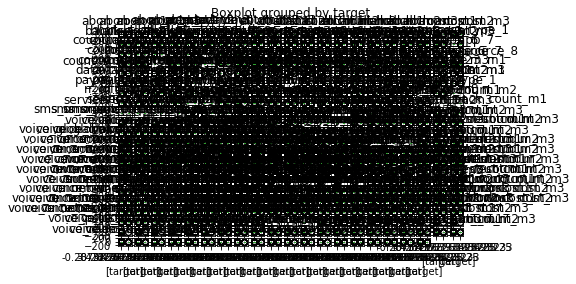

In [20]:
#XYtrain_sc.boxplot(by='target')
#plt.savefig('boxplot')

In [34]:
#AAAAA Boxplots!!!

In [30]:
a = X_train.loc[X_train['target']==0,'block_flag']#[1,1,1,1,2,2,2,2,3,3,4,5,5]
collections.Counter(a)

Counter({0: 44048, 1: 1209})

In [31]:
a = X_train.loc[X_train['target']==1,'block_flag']#[1,1,1,1,2,2,2,2,3,3,4,5,5]
collections.Counter(a)

Counter({0: 3704, 1: 39})

categorical variables

In [32]:
cat = [
    'device_type',
    'manufacturer_category',
    'os_category'
]

In [29]:
import collections
a = X_train['device_type']#[1,1,1,1,2,2,2,2,3,3,4,5,5]
collections.Counter(a)

Counter({1: 494, 3: 20, 4: 6863, 5: 81, 6: 268, 7: 40122, 8: 1152})

In [30]:
#a = X_train['manufacturer_category']
#collections.Counter(a)

(array([ 6834.,   727.,  1725.,  6144., 11104., 14029.,   220.,   262.,
         1236.,  6719.]),
 array([1.0000e+00, 1.8450e+02, 3.6800e+02, 5.5150e+02, 7.3500e+02,
        9.1850e+02, 1.1020e+03, 1.2855e+03, 1.4690e+03, 1.6525e+03,
        1.8360e+03]),
 <a list of 10 Patch objects>)

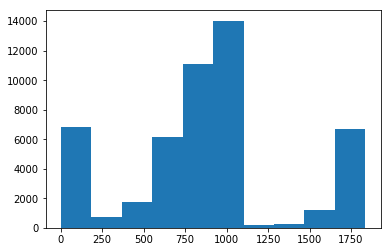

In [31]:
plt.hist(X_train['manufacturer_category'])

In [32]:
X_train.loc[:,'manufacturer_category_new'] = X_train.loc[:,'manufacturer_category']

c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [33]:
series = pd.value_counts(X_train['manufacturer_category'])
#mask = (series/series.sum() * 100).lt(10)
mask = series .lt(4000)
# To replace df['column'] use np.where I.e 
X_train.loc[:,'manufacturer_category_new'] = np.where(X_train['manufacturer_category'].isin(series[mask].index),2000,X_train['manufacturer_category'])

In [34]:
X_train['manufacturer_category_new'].value_counts()

2000    25735
1057    12417
1756     6100
69       4748
Name: manufacturer_category_new, dtype: int64

In [35]:
list(X_train['manufacturer_category_new'].value_counts())

[25735, 12417, 6100, 4748]

In [36]:
man_cat = X_train['manufacturer_category_new'].unique()
man_cat

array([2000, 1057,   69, 1756], dtype=int64)

In [37]:
X_test.loc[:,'manufacturer_category_new'] = X_test.loc[:,'manufacturer_category'] 


In [38]:
mask = (X_test['manufacturer_category'])== man_cat[1]

In [39]:
vec = [1,2,3,2000,1057,20]

In [40]:
vec.any(vec==c for c  in man_cat)

AttributeError: 'list' object has no attribute 'any'

In [41]:
[n for n, x in enumerate(lst) if value in x]

NameError: name 'lst' is not defined

In [42]:
X_test.loc[mask, 'manufacturer_category_new'] = 2000

In [43]:
#to be finished!!!

In [33]:
X_train['device_type'].value_counts()

7    40122
4     6863
8     1152
1      494
6      268
5       81
3       20
Name: device_type, dtype: int64

(array([4.9400e+02, 0.0000e+00, 2.0000e+01, 0.0000e+00, 6.8630e+03,
        8.1000e+01, 0.0000e+00, 2.6800e+02, 4.0122e+04, 1.1520e+03]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

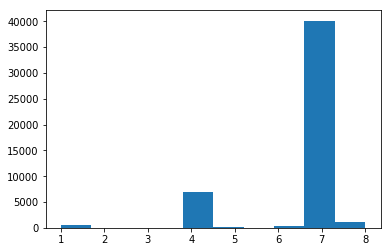

In [46]:
plt.hist(X_train['device_type'])

(array([3.8563e+04, 7.6000e+01, 1.5000e+01, 1.0000e+00, 1.0000e+00,
        1.2280e+03, 2.0000e+00, 2.2500e+02, 5.2000e+01, 8.8370e+03]),
 array([ 1. ,  3.7,  6.4,  9.1, 11.8, 14.5, 17.2, 19.9, 22.6, 25.3, 28. ]),
 <a list of 10 Patch objects>)

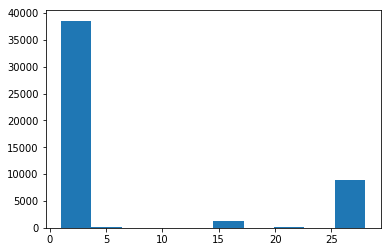

In [47]:
plt.hist(X_train['os_category'])

c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([19211.,     0.,     0.,     0.,     0., 29259.,     0.,     0.,
            0.,    36.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

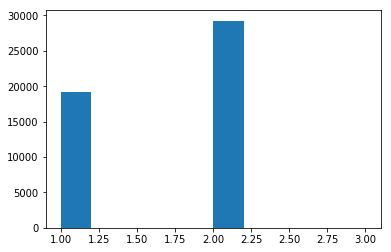

In [48]:
plt.hist(X_train['sim_count'])

In [55]:
XYtrain = X_train
XYtest = X_test

In [56]:
XYtrain.loc[:,'target'] = y_train

In [57]:
XYtest.loc[:,'target'] = y_test